In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


In [158]:
dataset=pd.read_csv(r"C:\Users\SK MIANUR RAHAMAN\Downloads\House price  dataset\Kolkata.csv")
dataset.head(3)
dataset.shape

(6507, 40)

In [159]:
dataset[dataset.duplicated()]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
20,2235000,1016,Barasat,3,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
21,3665999,1111,Keshtopur,2,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
22,3774000,1020,Rajarhat,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
23,2524000,935,Narendrapur,2,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
24,8300000,1956,New Town,3,1,0,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,85300000,5359,Alipore,4,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
6006,4292000,5359,Alipore,4,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
6409,6000000,1110,Howrah,2,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
6433,2500000,1785,Howrah,4,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


#duplicate rows excluding price

In [160]:
group_cols = [col for col in dataset.columns if col != 'Price']
near_duplicates = dataset.duplicated(subset=group_cols, keep=False)
print("Duplicate rows (excluding Price):", near_duplicates.sum())

Duplicate rows (excluding Price): 3856


#Remove duplicates (except for Price) by grouping identical rows and averaging the Price(dropped 41% duplicate data)

In [161]:
dataset_cleaned= dataset.groupby(group_cols, as_index=False)['Price'].mean()

print("Shape before cleaning:", dataset.shape)
print("Shape after cleaning:", dataset_cleaned.shape)

Shape before cleaning: (6507, 40)
Shape after cleaning: (3811, 40)


#before and after clean

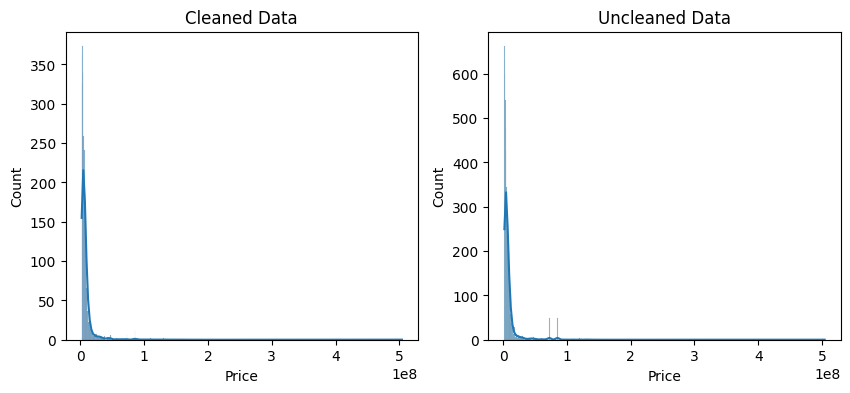

In [195]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(dataset_cleaned['Price'], kde=True)
plt.title("Cleaned Data")
plt.subplot(1,2,2)
sns.histplot(dataset['Price'], kde=True)
plt.title("Uncleaned Data")
plt.show()

#Outlier

In [192]:
'''Q1=dataset["Price"].quantile(0.25)
Q3=dataset["Price"].quantile(0.75)

IQR=Q3-Q1
lower_r=Q1-3*IQR
max_r=Q3+1.3*IQR
dataset=dataset[(dataset["Price"]<=max_r)]
dataset.shape'''


'Q1=dataset["Price"].quantile(0.25)\nQ3=dataset["Price"].quantile(0.75)\n\nIQR=Q3-Q1\nlower_r=Q1-3*IQR\nmax_r=Q3+1.3*IQR\ndataset=dataset[(dataset["Price"]<=max_r)]\ndataset.shape'

#Statistical Analysis

In [ ]:
dataset.describe()

#information about dataset

In [164]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 3811 non-null   int64  
 1   Location             3811 non-null   object 
 2   No. of Bedrooms      3811 non-null   int64  
 3   Resale               3811 non-null   int64  
 4   MaintenanceStaff     3811 non-null   int64  
 5   Gymnasium            3811 non-null   int64  
 6   SwimmingPool         3811 non-null   int64  
 7   LandscapedGardens    3811 non-null   int64  
 8   JoggingTrack         3811 non-null   int64  
 9   RainWaterHarvesting  3811 non-null   int64  
 10  IndoorGames          3811 non-null   int64  
 11  ShoppingMall         3811 non-null   int64  
 12  Intercom             3811 non-null   int64  
 13  SportsFacility       3811 non-null   int64  
 14  ATM                  3811 non-null   int64  
 15  ClubHouse            3811 non-null   i

#Checking for null values

In [165]:
dataset_cleaned.isnull().sum()

Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Stadium                0
Price                  0


#columns

In [166]:
dataset_cleaned.columns

Index(['Area', 'Location', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Stadium', 'Price'],
      dtype='object')

#splitting dataset & transforming price for skewed nature

In [167]:
y=np.log1p(dataset_cleaned["Price"])
x=dataset_cleaned.iloc[:,1:]

#splitting categorical and non categorical data

In [168]:
categorical_feature=["Location"]
numerical_features=[col for col in x.columns if col not in categorical_feature]

#encoding categorical data

In [169]:
ohe=OneHotEncoder(handle_unknown="ignore",sparse_output=False)
x_cat=ohe.fit_transform(x[categorical_feature])

#scaling numerical data

In [170]:
sc=StandardScaler()
x_num=sc.fit_transform(x[numerical_features])

#combining categorical and numerical data

In [171]:
x_processed=np.hstack([x_num,x_cat])

#splitting data into train test

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x_processed,y,test_size=0.2,random_state=42)

#Training Model

In [174]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#transforming(log->exp)

In [175]:
y_pred=np.expm1(model.predict(x_test))
y_true=np.expm1(y_test)
#r2_score
r2=r2_score(y_true,y_pred)
r2*100


99.38219823228165

In [ ]:
#predicted price vs actual price(log->exp)

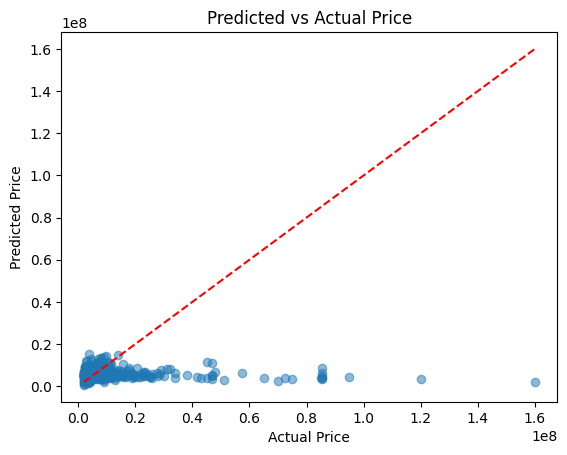

In [177]:
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price")
plt.show()
